In [ ]:
##Question: Do certain attributes (reach, grip strength on different hold types, etc.) allow climbers to outperform other 
##climbers regardless of the randomly generated wall they are climbing on? AKA, is there an ideal body type for climbing?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [133]:
class climber:
    """
    Class representing a climber
    """
    def __init__(self, reach, sloper, crimp, jug, position = np.array([5,0]), icon="*"):
        self.reach = reach
        ##Strength (Percent Chance of Sticking a Move To) on Different Types of Holds/Rock
        self.sloper = sloper
        self.crimp = crimp
        self.jug = jug
        ##Location on the wall
        self.position = position
        ##Icon for visualization
        self.icon = icon
        
    def make_move(self, holds):
        '''Accepts a list of holds on a wall, will attempt to move to a nearby hold higher up on the wall'''
        reachable = []
        for hold in holds:
            
            if self.reach > np.linalg.norm(self.position-hold.coords) and self.position[1]-hold.coords[1] < 0 and np.linalg.norm(self.position - hold.coords) != 0:
                reachable.append(hold)
        
        for hold in reachable:
            if hold.type == 'sloper':
                if random.random() < self.sloper:
                    self.position = hold.coords
                    return 'stuck'
            elif hold.type == 'jug':
                if random.random() < self.jug:
                    self.position = hold.coords
                    return 'stuck'
            elif hold.type == 'crimp':
                if random.random() < self.crimp:
                    self.position = hold.coords
                    return 'stuck'
                
        return 'fall'
    
    def set_position(self, position = np.array([5, 0])):
        '''Sets position, can be used to reset after climbing a wall'''
        self.position = np.array(position)

In [112]:
class Hold:
    def __init__(self, coords, type_):
        self.coords = np.array(coords)
        self.type = type_

In [119]:
class cell:
    """
    Class representing one 10 by 10 cell on a wall
    Attributes:
    slopers - number of sloper holds
    crimps - number of crimp holds
    jugs - number of jug holds
    height - height of the cell along the wall. should be multiple of 10
    holds - array of hold objects in the cell
    
    methods:
    show(): plots cell
    """
    def __init__(self, slopers, crimps, jugs, height = 0):
        ##Number of Each Type of Hold/Rock
        self.slopers = slopers
        self.crimps = crimps
        self.jugs = jugs
        self.num_cells = 1
        ##Setting Coordinates of the Holds
        self.total_holds = self.slopers + self.crimps + self.jugs
        self.x = np.random.randint(1, 11, size = self.total_holds)
        self.y = np.random.randint(1, 11, size = self.total_holds)
        self.holds = []
        self.hold_types = []
        for i in range(slopers):
            new_hold = Hold([self.x[i], self.y[i]+height], "sloper")
            self.holds.append(new_hold)
            self.hold_types.append("sloper")
        for i in range(crimps):
            new_hold = Hold([self.x[i], self.y[i]+height], "crimp")
            self.holds.append(new_hold)
            self.hold_types.append("crimp")
        for i in range(jugs):
            new_hold = Hold([self.x[i], self.y[i]+height], "jug")
            self.holds.append(new_hold)       
            self.hold_types.append("jug")
        
    def show(self):
        '''Plots cell with all holds'''
        sns.scatterplot(x = self.x,y = self.y, hue = self.hold_types, style = self.holds, palette = 'bright', s = 100)
        plt.axis([0,10, 0, 10])
        plt.show()
    


In [201]:
class wall:
    """
    Class representing a whole wall, made up of cells
    """
    def __init__(self, smallwall, cell):
        ##Number of Each Type of Hold/Rock
        self.slopers = smallwall.slopers + cell.slopers
        self.crimps = smallwall.crimps + cell.crimps
        self.jugs = smallwall.jugs + cell.jugs
        self.num_cells = smallwall.num_cells + cell.num_cells
        self.hold_types = smallwall.hold_types + cell.hold_types
        ##Setting Coordinates of the Holds
        self.total_holds = self.slopers + self.crimps + self.jugs
        self.x = np.concatenate((smallwall.x, cell.x))
        self.y = np.concatenate((smallwall.y, cell.y + np.repeat(10*(self.num_cells-1), len(cell.y))))
        self.holds = np.concatenate((smallwall.holds, cell.holds))
        self.hold_cords = []
        for i in range(self.total_holds):
            self.hold_cords.append([self.x[i], self.y[i]])
        
    def show(self, show_scale = 1, title = 'Rock Wall'):
        '''Plots Wall with all holds shown'''
        fig = plt.figure(figsize = (10*show_scale, len(self.x)*show_scale))
        sns.scatterplot(x = self.x,y = self.y, hue = self.hold_types, style = self.hold_types, palette = 'bright', s = 100)
        plt.axis([0,10, 0, 10*self.num_cells])
        plt.title(title)
        plt.show()
        
    def run_wall(self, climber):
        '''Takes in a climber object and simulates the climber attempting to climb the wall. 
        Returns a list of all points the holder occupied during their path'''
        path = []
        status = "stuck"
        while status == "stuck":
            path.append(climber.position)
            status = climber.make_move(self.holds)
        climber.set_position()
        return path
    
    def plot_path(self, path, show_scale = 1, title = 'Rock Wall'):
        '''Plots wall along with climber path for the given path'''
        fig = plt.figure(figsize = (10*show_scale, len(self.x)*show_scale))
        sns.scatterplot(x = self.x,y = self.y, hue = self.hold_types, style = self.hold_types, palette = 'bright', s = 100)
        plt.axis([0,10, 0, 10*self.num_cells])
        plt.title(title)
        plt.plot(*zip(*path))
        plt.show()

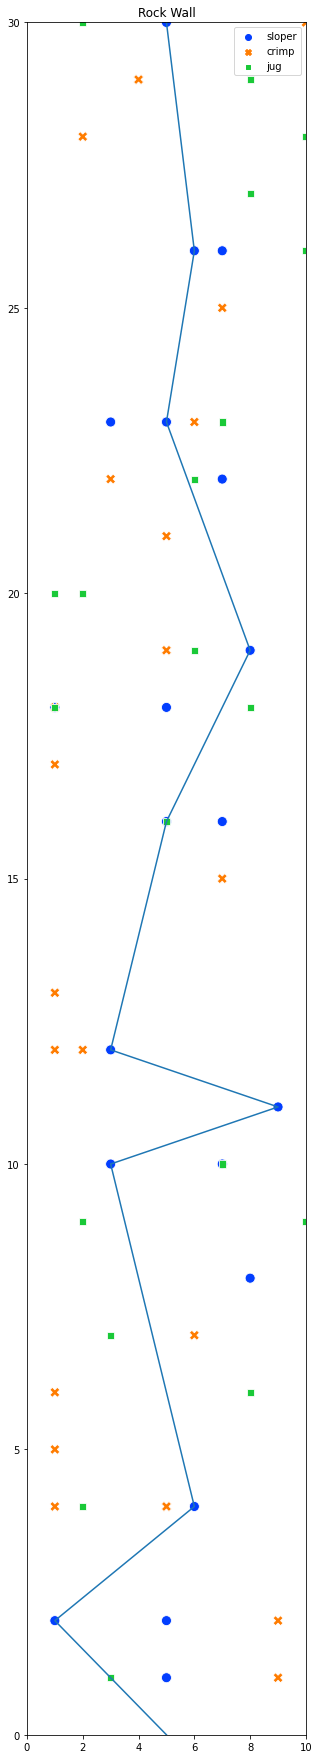

In [202]:
cell1 = cell(7,7,7)
cell2 = cell(7,7,7,10)
cell3 = cell(7,7,7,20)
wall1 = wall(cell1, cell2)
wall1 = wall(wall1, cell3)
plt.legend
climber1 = climber(7, 0.8, 0.8, 0.8)
wall1.plot_path(wall1.run_wall(climber1), 0.5)

In [69]:
##Notes
##We decided two holds being placed in the same location is appropriate given that many climbing gyms will drill one hold on 
##top of another to make the move easier/more attainable for different climbing types

In [141]:
def create_wall(cells, slopers, crimps, jugs):
    '''Creates a wall with given specifications'''
    cell1 = cell(slopers, crimps, jugs)
    cell2 = cell(slopers, crimps, jugs, 1)
    smallwall = wall(cell1,cell2)
    for i in range(cells-2):
        cell1 = cell(slopers, crimps, jugs, i+2)
        smallwall = wall(smallwall, cell1)
    return smallwall

In [ ]:
def create_climbers(n, reach, slopers, crimps, jugs):
    '''Each input other than n is a list of 2 numbers, a min and a max for that attribute
        Creates a list of n climbers with attributes '''